# k-means k均值算法

### 0.引入依赖

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#直接生成聚类数据的方法
from sklearn.datasets.samples_generator import make_blobs

### 1.数据加载 

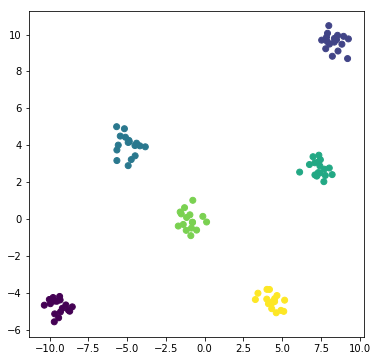

array([[-5.17641528,  4.89343931],
       [-8.95713472, -4.6614717 ],
       [ 8.57721387,  9.95826995],
       [-9.65918449, -4.45094631],
       [-1.18880906, -0.61757586],
       [-9.30581528, -5.04059608]])

In [81]:
x, y = make_blobs( n_samples = 100, centers = 6, random_state = 234, cluster_std = 0.5)

plt.figure(figsize = (6,6))
plt.scatter(x[: , 0], x[: , 1], c = y)
plt.show()

"""
a = np.array([])
print(a.shape)

a = [[1,2,3], [4,5,6], [7,8,9]]
a = np.array(a)
a[1]
"""
x[np.random.randint(low = 0, high = x.shape[0], size = 6)]

### 2.核心算法实现

In [88]:
#调库计算距离
from scipy.spatial.distance import cdist

class K_Means:
    #初始化，参数为 n_cluster(聚类数)、max_iter(迭代次数)、centroids(质心)
    def __init__(self, n_clusters = 6, max_iter = 1000, centroids = []):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = np.array( centroids , dtype = np.float )
        
    #训练模型，聚类过程，需要原始数据
    def fit(self, data):
        #如果没有指定初始质心，随机选取data中的点作为初始质心
        if ( self.centroids.shape == (0,) ):
            #从data中随机生成clusters个质心
            self.centroids = data[ np.random.randint( low = 0, high = data.shape[0], size = self.n_clusters ) ]
            
        #开始迭代
        for i in range(self.max_iter):
            #1. 计算距离，得到的是 data个数 * 质心数 的矩阵
            distance = cdist(data, self.centroids)
            
            #2. 对距离排序，选取最近的质心点，作为当前点的分类
            nearest = np.argmin( distance, axis = 1 )
            
            #3. 对每一类点数据进行均值计算，更新质心坐标
            for k in range(self.n_clusters):
                if k in nearest:
                    self.centroids[k] = np.mean( data[ nearest == k ] , axis = 0 )
        
        #预测
    def predict(self, sample):
        #跟上面一样，先计算距离，然后选取距离最近的质心的类别
        distance = cdist(sample, self.centroids)
        nearest = np.argmin( distance, axis = 1 )
            
        return nearest

### 3.测试

'\n#预测新的数据点的类别\nx_new = np.array([[0,0],[10,1]])\ny_pred = kmeans.predict(x_new)\n\nprint(y_pred)\n\nplt.scatter(x_new[:,0], x_new[:,1], s = 100, c = y_pred)\n'

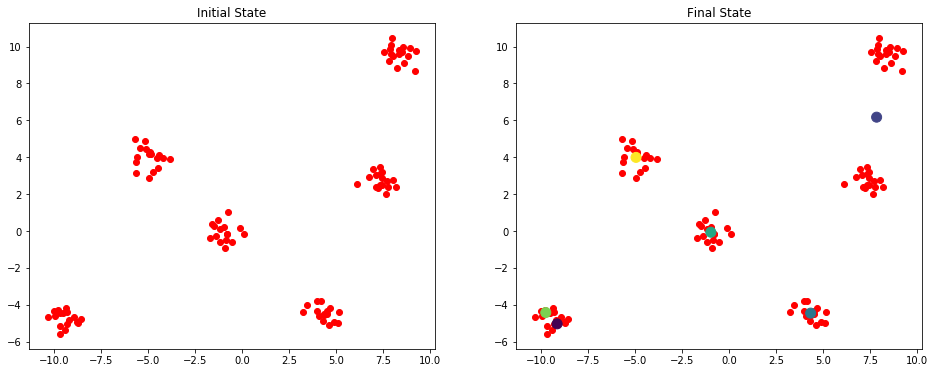

In [90]:
#绘图
def plotKMeans(x , y, centroids, subplot, title):
    #分配子图
    plt.subplot(subplot)
    plt.scatter(x[ : , 0], x[ : , 1], c = 'r')
    #画出质心点
    if (centroids.shape[0] != 0):
        plt.scatter(centroids[ : , 0], centroids[ : , 1], c = np.array(range(6)), s = 100)
    plt.title(title)
    
kmeans = K_Means()

plt.figure(figsize = (16, 6))
plotKMeans(x, y, kmeans.centroids, 121, 'Initial State')

#开始聚类
kmeans.fit(x)

plotKMeans(x, y, kmeans.centroids, 122, 'Final State')

"""
#预测新的数据点的类别
x_new = np.array([[0,0],[10,1]])
y_pred = kmeans.predict(x_new)

print(y_pred)

plt.scatter(x_new[:,0], x_new[:,1], s = 100, c = y_pred)
"""